<a href="https://colab.research.google.com/github/aasingh27/LSTM_EquityModel/blob/main/LSTMModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

<function matplotlib.pyplot.show(close=None, block=None)>

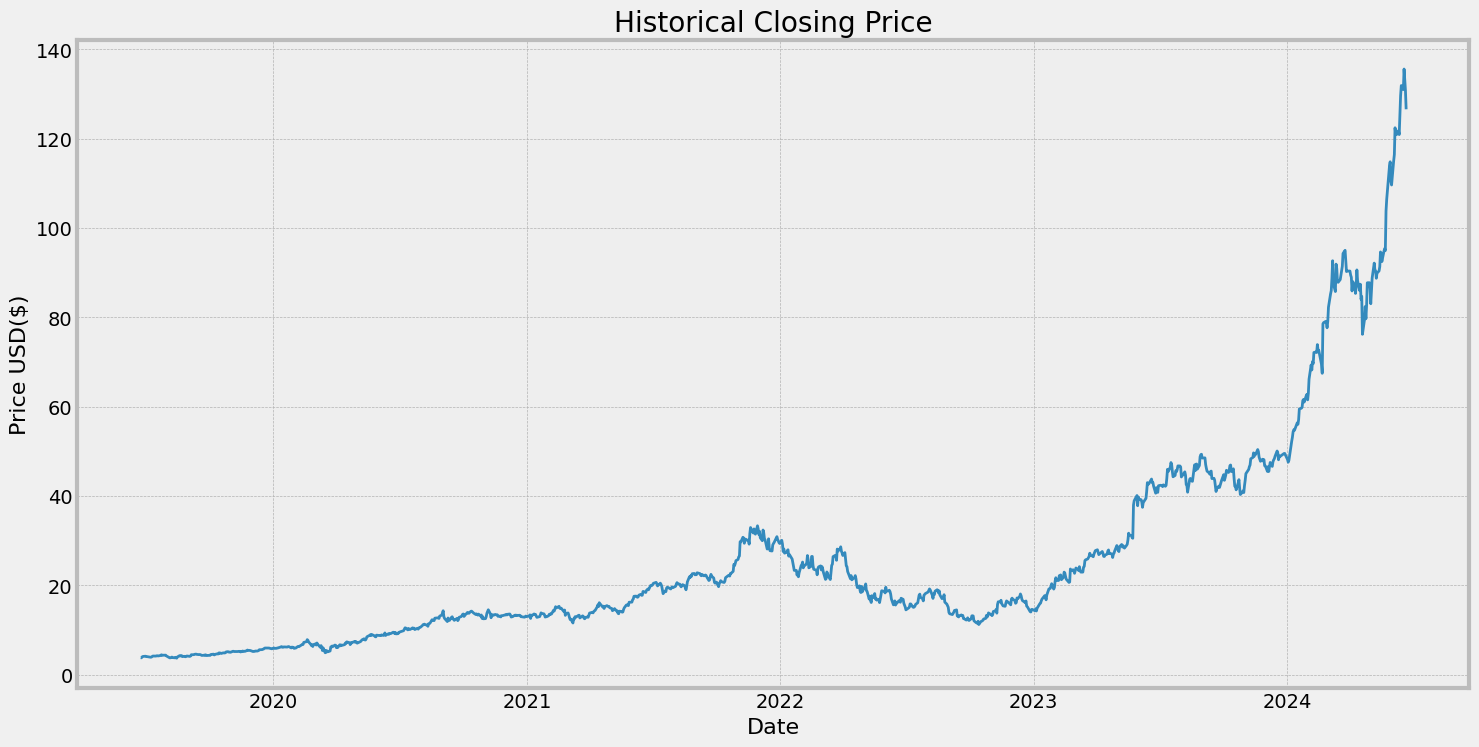

In [47]:
#Import libararies

import math
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import numpy
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use("bmh")


nvda = yf.Ticker("NVDA")
df = nvda.history(period = "5y")

plt.figure(figsize=(16,8))
plt.title("Historical Closing Price")
plt.plot(df["Close"])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price USD($)', fontsize=16)
plt.show


In [54]:
data = df.filter(['Close'])

dataset = data.values

training_set_length = math.ceil(len(dataset) * 0.8)

#Scale data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

#Training data set

train_data = scaled_data[0:training_set_length, :]


array([[7.33167045e-04],
       [5.10762279e-04],
       [1.97710541e-03],
       ...,
       [1.00000000e+00],
       [9.63603832e-01],
       [9.31681386e-01]])